<a href="https://colab.research.google.com/github/Ranjitkumarmuduli/Regression-capstone-project/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
#Importing some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#importing dataset
path='/content/drive/MyDrive/ Data sets/ Machine Leaerning Data/SeoulBikeData.csv'
data=pd.read_csv(path,encoding='unicode_escape')

In [5]:
#Showing dataset
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Data Inspection

In [6]:
#shape of the dataset
data.shape

(8760, 14)

In [7]:
#copy of the dataset
df=data.copy()

In [8]:
#first five rows of the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
#last five rows of the dataset
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [10]:
#columns name of the dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [12]:
#Numerical describe of the dataset
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [13]:
#Renaming the columns name
df.rename({"Temperature(°C)": "Temperature",  
                      "Functioning Day":"Functioning_Day",
           "Humidity(%)": "Humidity",  
           "Wind speed (m/s)": "Wind_speed",
           "Visibility (10m)": "Visibility",
           "Dew point temperature(°C)": "Dew_point_temperature",
           "Solar Radiation (MJ/m2)": "Solar_Radiation",
           "Snowfall (cm)": "Snowfall",
           "Rainfall(mm)": "Rainfall",
           "Rented Bike Count": "Rented_Bike_Count"},  
          axis = "columns", inplace = True) 

In [14]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

# EDA

In [15]:
#Describing all the columns
df.describe(include='all')

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [16]:
#Finding nullvalues
df.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

There is no null values in the dataset.

In [17]:
#Finding duplicate values of the dataset
df.duplicated().sum()

0

We seen that their is no duplicate values in the dataset.

In [18]:
# parsing date variable
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y').dt.date

In [19]:
#Creating two new features 'month' and 'day_of_month'

df['month'] = pd.to_datetime(df['Date']).dt.month
df['day_of_month'] = pd.to_datetime(df['Date']).dt.day

In [20]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,day_of_month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1


We seen that new two columns 'month' and 'dat_of_month' was added successfully.

In [21]:
df.shape

(8760, 16)

In [22]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'month', 'day_of_month'],
      dtype='object')

# Univariate Analysis

**Rented Bike count** is depedent variables

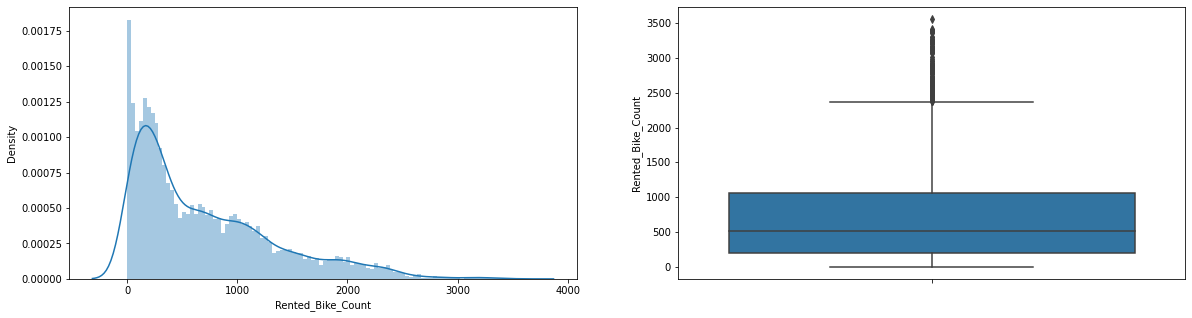

In [23]:
#Distribution of dependent variable
dep_var = 'Rented_Bike_Count'

fig, ax = plt.subplots(1,2,figsize = (20,5))
sns.distplot(df[dep_var], bins = 100,ax = ax[0])
sns.boxplot(y = df[dep_var], ax = ax[1])
plt.show()

Distribution of dependent variable 'Rented_Bike_Count' is positively skewed.

In [24]:
# creating list of numerical independent variables
num_ind_var = list(set(df.describe().columns) - {dep_var})

# creating list of categorical independent variables
cat_dep_var = list(set(df.columns) - set(df.describe().columns))

In [25]:
num_ind_var

['Wind_speed',
 'Snowfall',
 'day_of_month',
 'Hour',
 'month',
 'Temperature',
 'Solar_Radiation',
 'Dew_point_temperature',
 'Rainfall',
 'Humidity',
 'Visibility']

In [26]:
cat_dep_var

['Holiday', 'Seasons', 'Functioning_Day', 'Date']

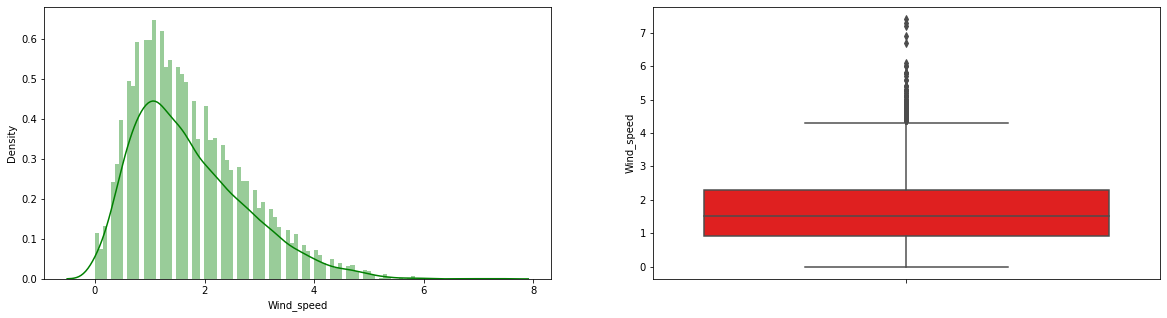

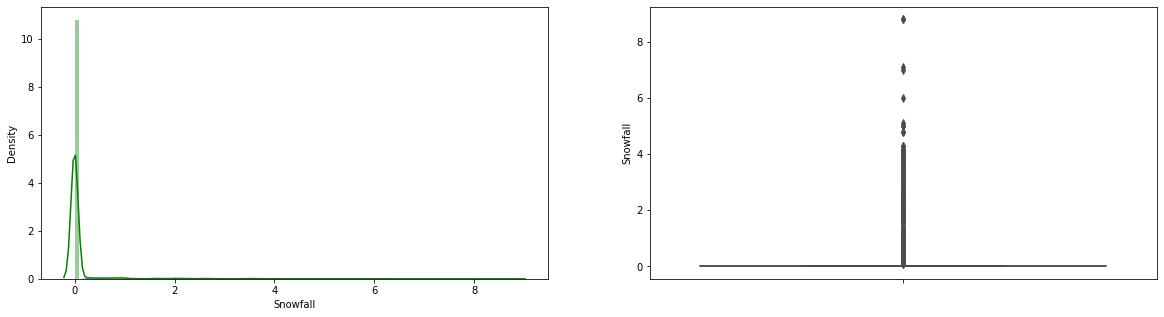

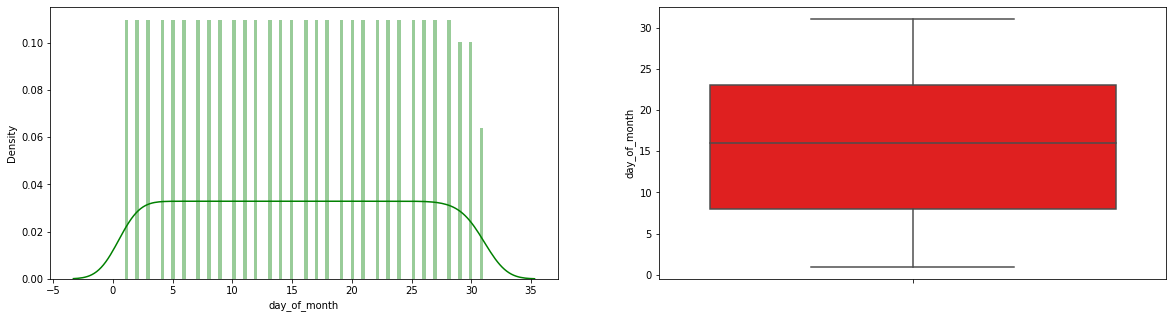

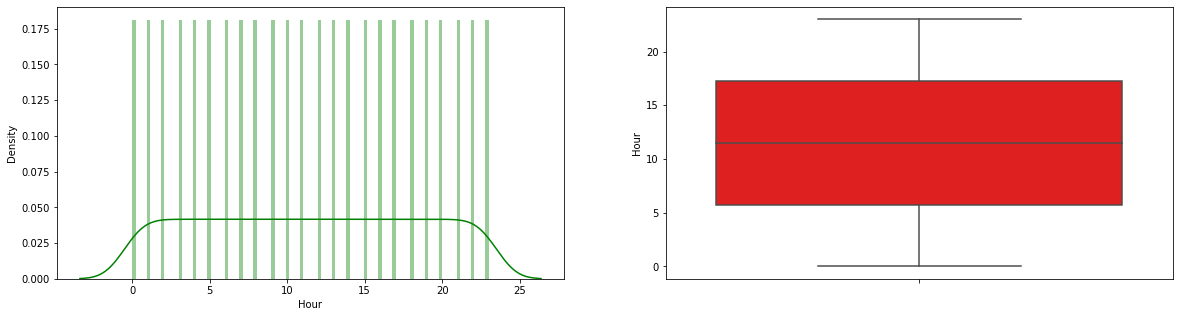

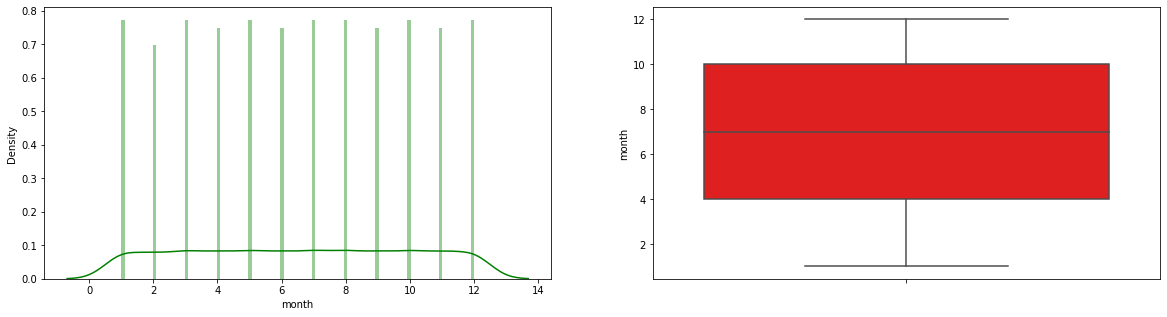

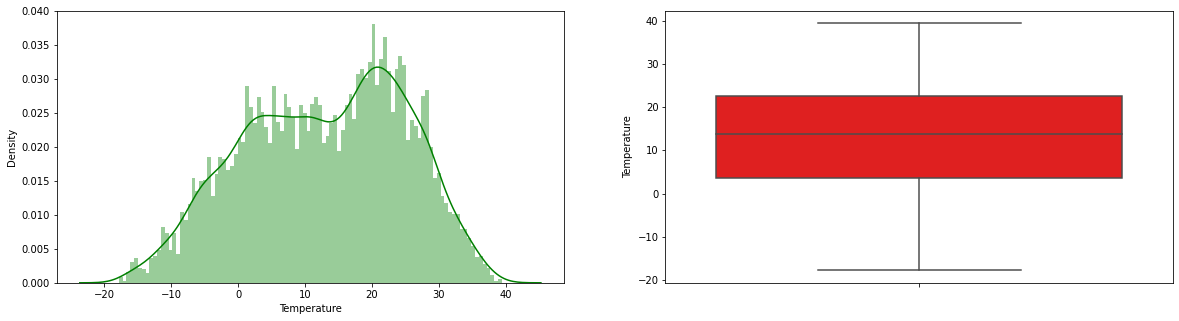

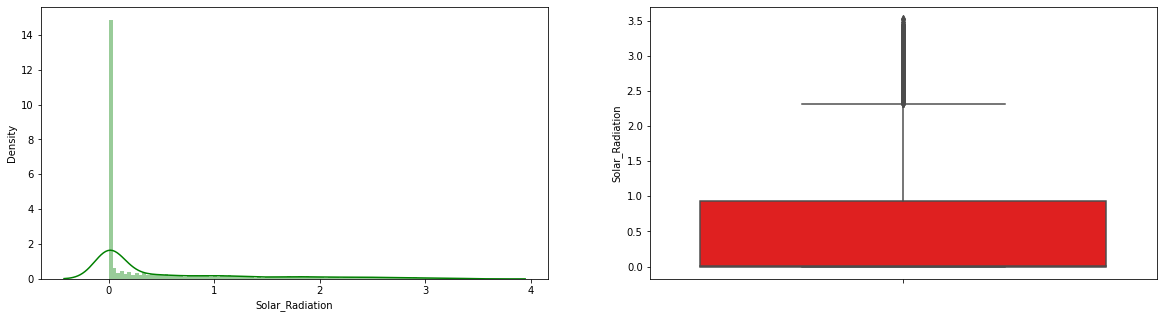

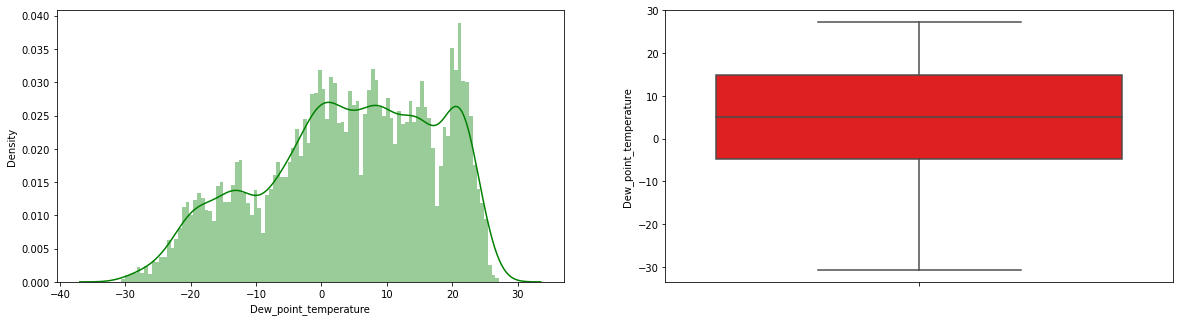

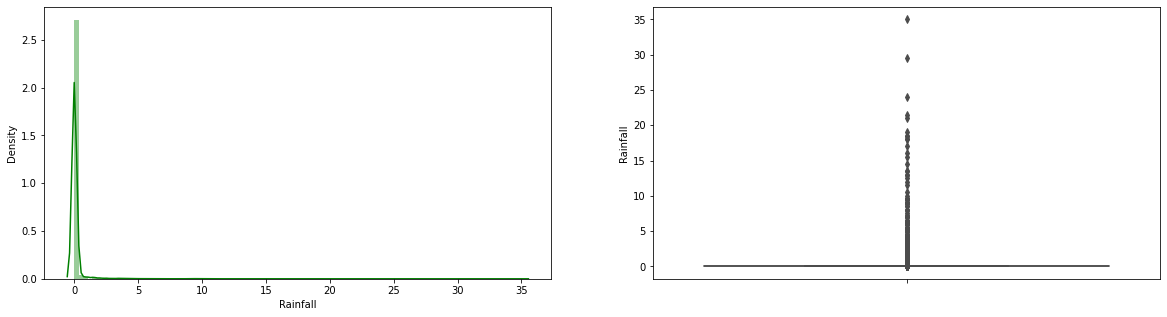

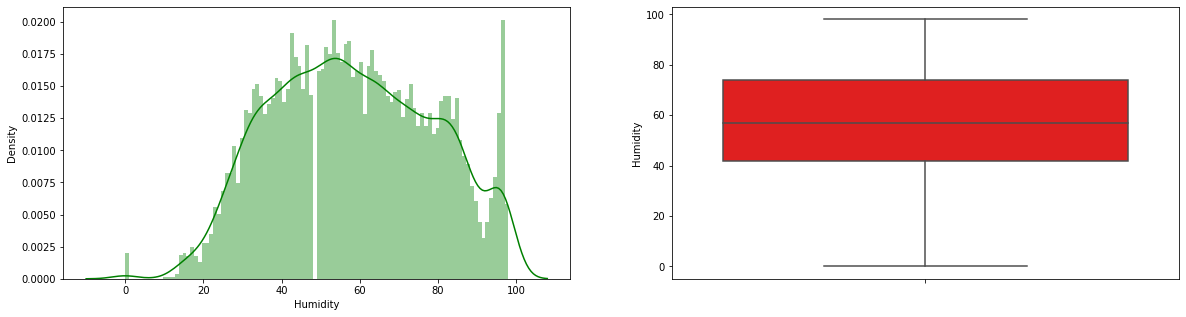

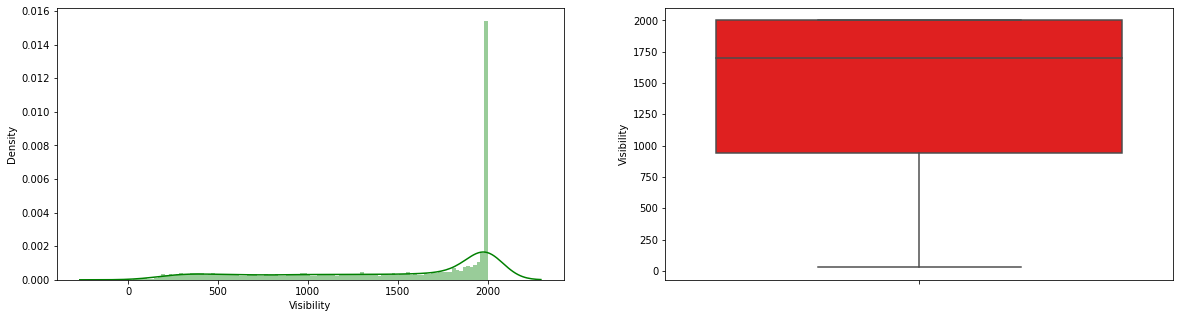

In [27]:
# distribution and boxplot of all numerical independent variables
for col in num_ind_var:
  fig, ax = plt.subplots(1,2,figsize = (20,5))
  sns.distplot(df[col],bins = 100, ax = ax[0],color='g')
  sns.boxplot(y = df[col], ax = ax[1],color='red')
  plt.show()

Distribution of 'Wind_speed', 'Snowfall' ,'Rainfall', 'Solar radiation' is positively skewed.

Distribution of 'Visibility', 'Temperature' is negatively skewed.

In [28]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'month', 'day_of_month'],
      dtype='object')

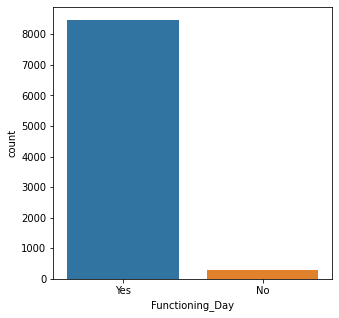

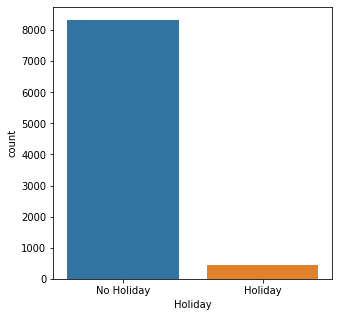

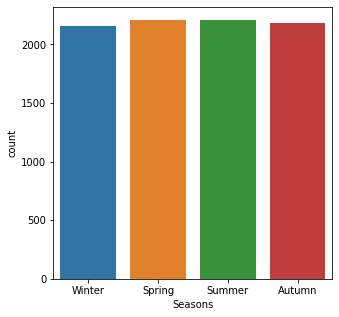

In [29]:
# Plotting graph for categorical features

for col in ['Functioning_Day','Holiday','Seasons']:
  plt.figure(figsize = (5,5))
  sns.countplot(x = df[col])
  plt.show()

## Bivariate Analysis


---

Realation between DV ana IV.

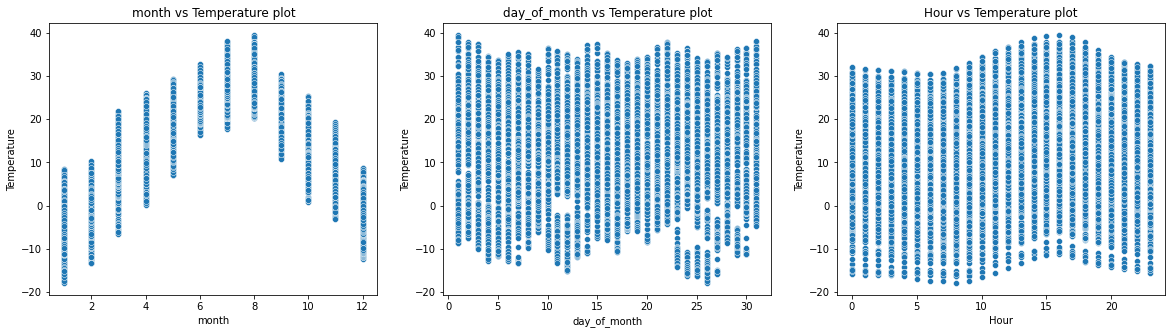

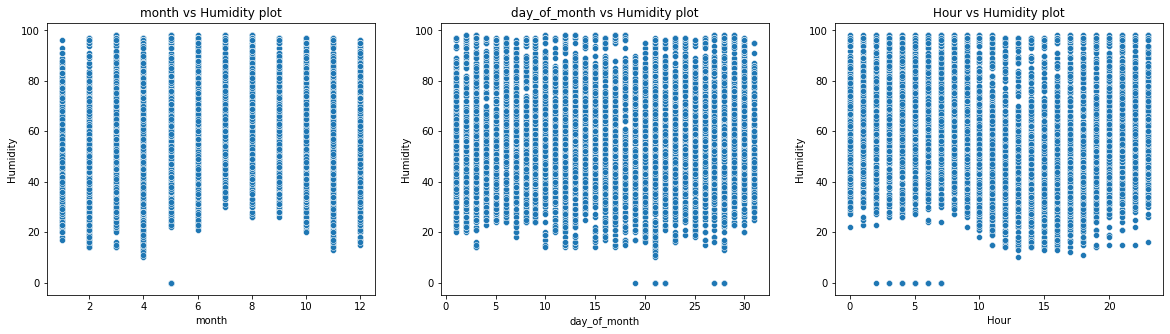

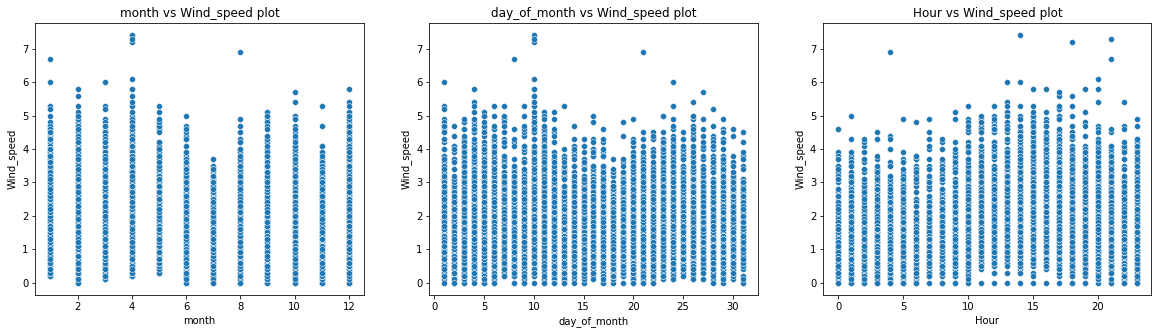

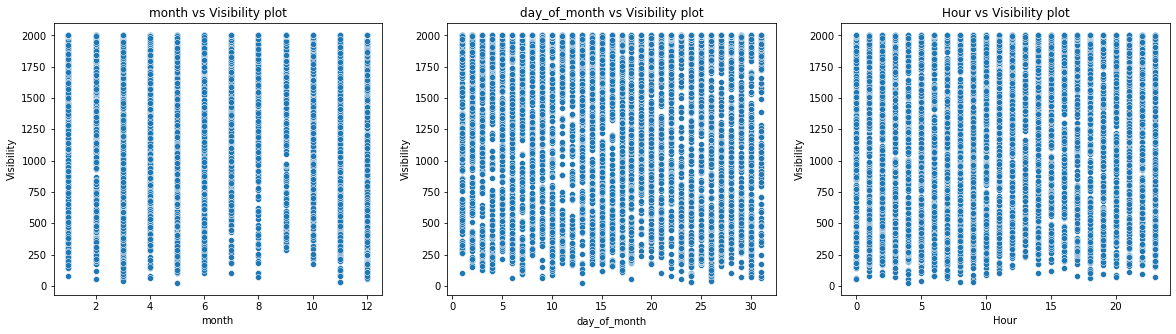

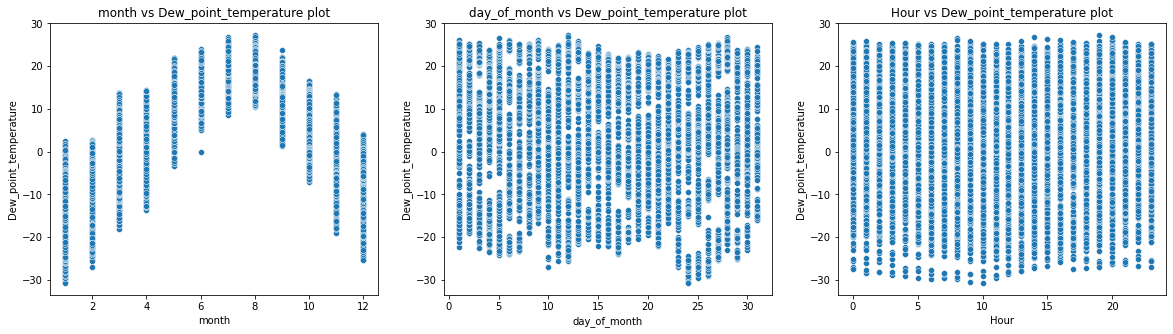

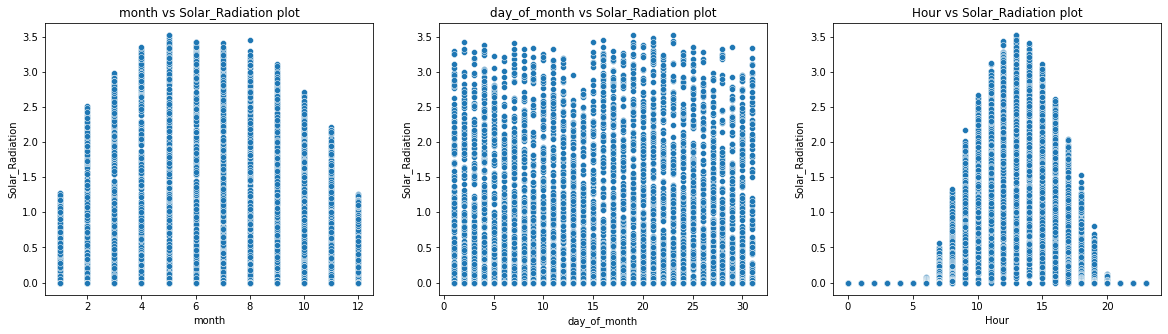

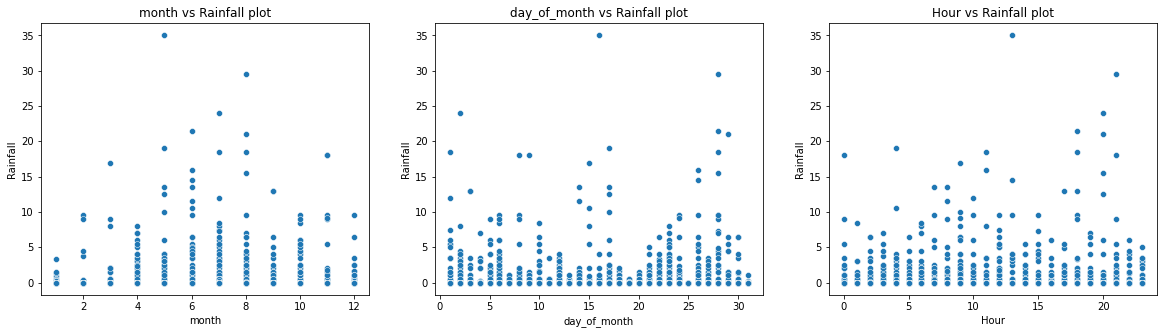

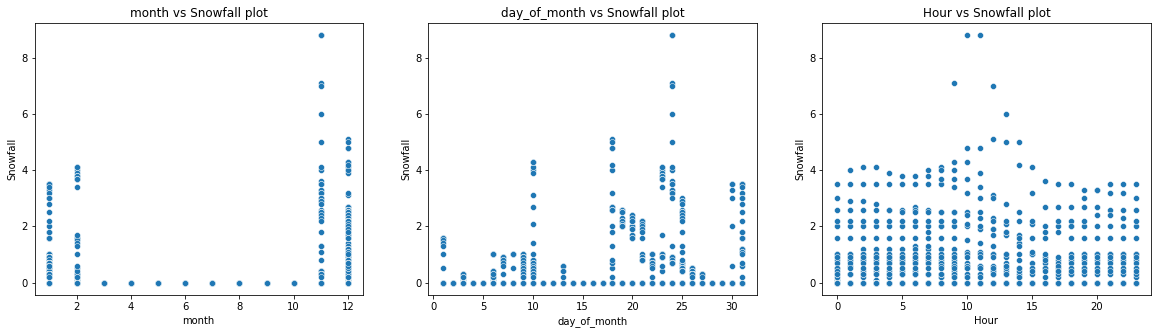

In [34]:
for col in ['Temperature','Humidity','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall']:
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    for index,col1 in enumerate(['month','day_of_month','Hour']):
       sns.scatterplot(x = df[col1], y = df[col], ax=ax[index])
       ax[index].set_title(f"{col1} vs {col} plot")
    plt.show()
    print('\n\n\n')

Relation of various independent variable with dependent variable.

Text(0.5, 1.0, ' Average Rented Bike Count vs Date plot')

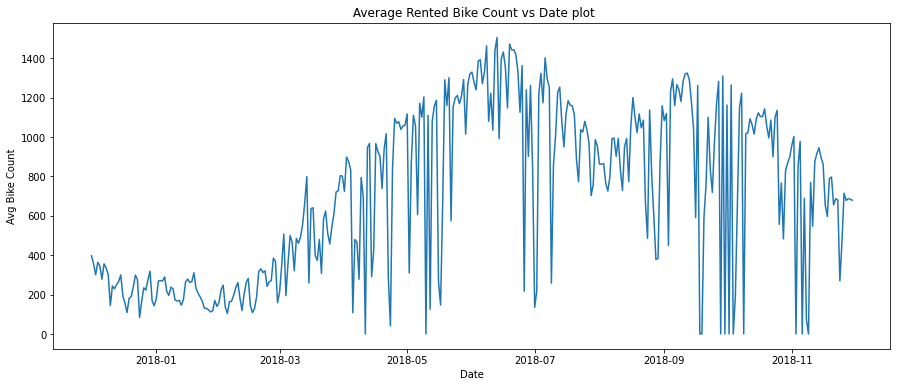

In [35]:
plt.figure(figsize = (15,6))
grouped = pd.DataFrame(round(df.groupby('Date')['Rented_Bike_Count'].mean())).rename(columns = {'Rented_Bike_Count':'Avg Bike Count'})
sns.lineplot(x = grouped.index, y = grouped['Avg Bike Count'])
plt.title(' Average Rented Bike Count vs Date plot')

Average no of bookings of bikes increases in middle of year.

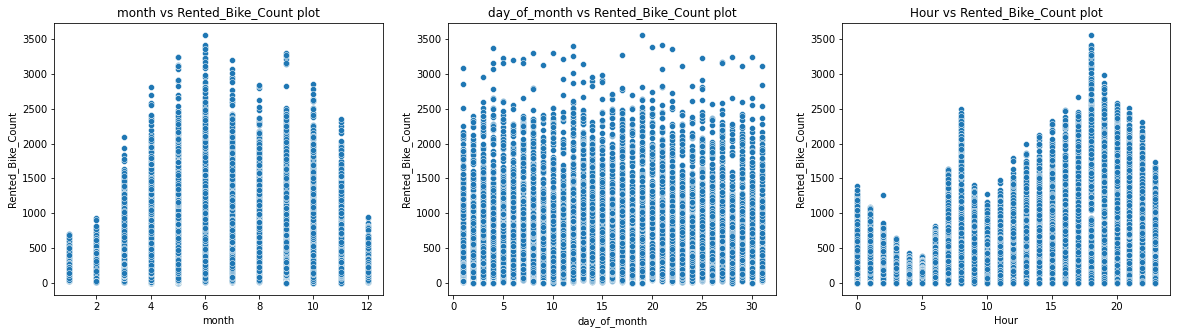

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
for index,col1 in enumerate(['month','day_of_month','Hour']):
  sns.scatterplot(x = df[col1], y = df[dep_var], ax=ax[index])
  ax[index].set_title(f"{col1} vs {dep_var} plot")
plt.show()

Number of bookings per hour is high for months like May, June, July, August and September.

Num of bookings are high for evening hours as compared to early day hours.

In [38]:
# Dropping 'Date' columns as we have created new features month and day_of_month from it.

df.drop(columns = ['Date'], inplace = True)

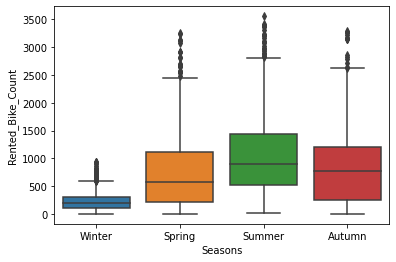

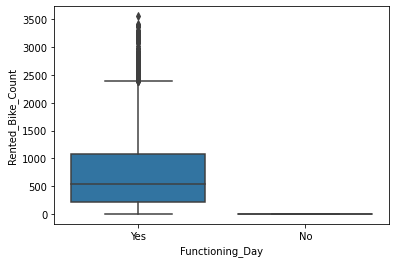

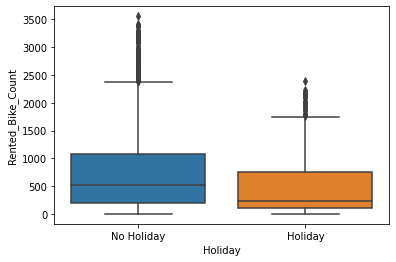

In [42]:
# Relation of dependent variable with categorical features

for col in ['Seasons','Functioning_Day','Holiday']:
  sns.boxplot(x = df[col],y = df['Rented_Bike_Count'])
  plt.show()

Num of bike bookings per hour are low in winter season as compared to other seasons.

On non-functioning day bookings are almost zero.

Correlation between different numerical features.

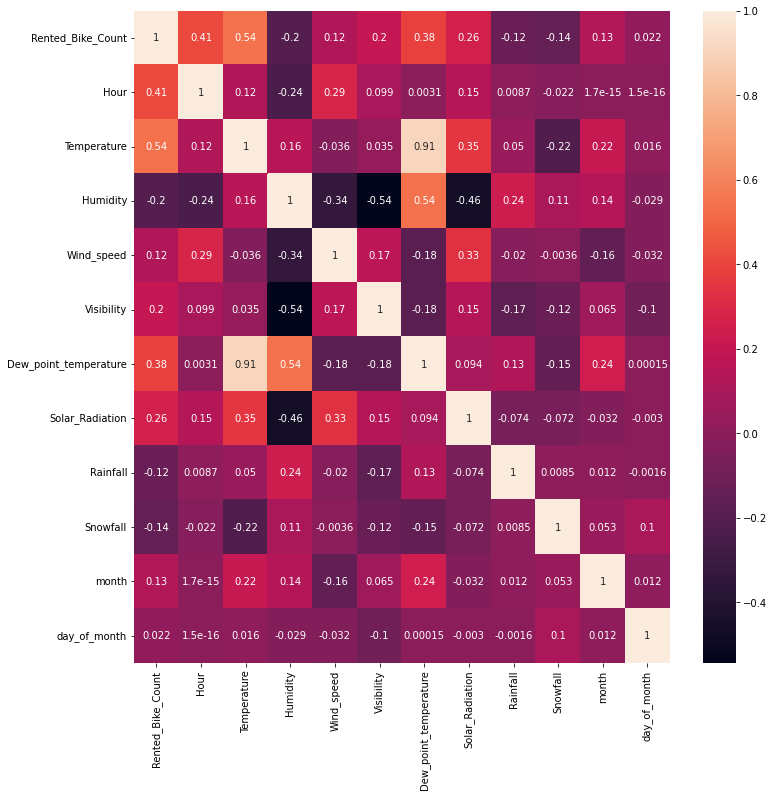

In [45]:
plt.figure(figsize = (12,12))
corr_df = df.corr()
sns.heatmap(corr_df, annot = True)

Dew point temerature and temperature are highly correlated.